# Problem 4: Machine Learning for Outlier detection

In this problem, we will detect anomaly listings using machine learning techniques. It is important to identify outliers. If outliers are a result of a data entry mistake, then these should be removed. However, if they are due to underlying variance in the data, then careful consideration needs to be applied, and decisions should be based on domain knowledge rather than just blindy removing outliers.

We will consider 2 approaches:
1. DBSCAN (Density-based spatial clustering of applications with noise)
2. Isolation Forest Algorithm

This will be applied to the Berlin listings (listings.csv).

Let us import the libraries we will need and read in files.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import missingno as msno # for missing analysis

In [2]:
# Assign common path for file
file_path = '/Users/jeffreylee/Documents/'

# Assign path for csv file
file_listings = file_path + 'Berlin_Airbnb_Dataset/listings.csv'

# Read in all the files into panda dataframes
df_listings = pd.read_csv(file_listings)

We will also have an initial understanding of the data by summarising it.

In [3]:
pd.set_option('display.max_columns', None)
df_listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,2.255200e+04,2.255200e+04,0.0,0.0,0.0,2.255200e+04,0.0,22526.000000,22526.000000,22552.000000,22552.000000,22552.000000,22520.000000,22534.000000,22512.000000,446.000000,22552.000000,22552.000000,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18163.000000,18138.000000,18141.000000,18120.000000,18134.000000,18121.000000,18117.000000,0.0,22552.000000,18638.000000
mean,1.571560e+07,2.018111e+13,NaN,NaN,NaN,5.403355e+07,NaN,2.330685,2.330685,52.509824,13.406107,2.637460,1.092695,1.161134,1.620558,465.401345,1.332121,7.157059,1.030505e+05,4.944173,11.146639,20.016096,79.852829,17.840679,94.413863,9.663965,9.324955,9.713521,9.730672,9.505491,9.411106,NaN,1.918233,1.135525
std,8.552069e+06,4.812607e+00,NaN,NaN,NaN,5.816290e+07,NaN,19.947823,19.947823,0.030825,0.057964,1.510548,0.329894,0.646156,1.174840,503.491935,0.835034,40.665073,9.640519e+06,8.677395,17.522371,28.349136,119.368162,36.769624,7.639644,0.740039,1.031996,0.704620,0.686614,0.762161,0.841492,NaN,3.667257,1.507082
min,2.015000e+03,2.018111e+13,NaN,NaN,NaN,2.217000e+03,NaN,0.000000,0.000000,52.345803,13.103557,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,8.065954e+06,2.018111e+13,NaN,NaN,NaN,9.240002e+06,NaN,1.000000,1.000000,52.489065,13.375411,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.180000
50%,1.686638e+07,2.018111e+13,NaN,NaN,NaN,3.126711e+07,NaN,1.000000,1.000000,52.509079,13.416779,2.000000,1.000000,1.000000,1.000000,403.500000,1.000000,2.000000,1.124000e+03,0.000000,0.000000,0.000000,4.000000,5.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,0.540000
75%,2.258393e+07,2.018111e+13,NaN,NaN,NaN,8.067518e+07,NaN,2.000000,2.000000,52.532669,13.439259,3.000000,1.000000,1.000000,2.000000,707.500000,1.000000,4.000000,1.125000e+03,6.000000,18.000000,36.000000,129.000000,16.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.500000
max,2.986735e+07,2.018111e+13,NaN,NaN,NaN,2.245081e+08,NaN,1676.000000,1676.000000,52.651670,13.757642,16.000000,8.500000,12.000000,22.000000,4639.000000,16.000000,5000.000000,1.000000e+09,30.000000,60.000000,90.000000,365.000000,498.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,45.000000,36.670000


In [4]:
df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-1

Most of the columns are not required, as they do not indicate if something is an outlier or not. We will select the following columns that are important indicators for an anomaly in the data:
- accommodates
- bedrooms
- bathrooms
- beds
- bed_type
- price
- number_of_reviews
- review_scores_rating
- reviews_per_month

In [5]:
keep = ['accommodates',
        'bedrooms',
        'bathrooms',
        'beds',
        'bed_type',
        'price',
        'number_of_reviews',
        'review_scores_rating',
        'reviews_per_month'
       ]

df_listing_outlier = df_listings.loc[:,keep].copy()

In [6]:
df_listing_outlier.head(10)

,accommodates,bedrooms,bathrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,reviews_per_month
0,3,1.0,1.0,2.0,Real Bed,$60.00,118,93.0,3.76
1,2,1.0,1.0,1.0,Real Bed,$17.00,6,100.0,1.42
2,4,1.0,1.0,2.0,Real Bed,$90.00,143,92.0,1.25
3,2,1.0,1.0,1.0,Pull-out Sofa,$26.00,25,88.0,0.39
4,2,1.0,1.0,2.0,Real Bed,$42.00,197,96.0,1.75
5,7,4.0,2.5,7.0,Real Bed,$180.00,6,100.0,0.15
6,2,0.0,1.0,1.0,Real Bed,$70.00,23,93.0,0.23
7,2,1.0,1.0,2.0,Real Bed,$120.00,0,NaN,NaN
8,5,1.0,1.0,3.0,Real Bed,$90.00,48,94.0,0.47
9,2,1.0,1.0,1.0,Real Bed,$45.00,279,96.0,2.83


We also notice there are some missing values in the columns. We need to fill these in before we apply the ML outlier detection methods. We will explore the missing values in all the columns.

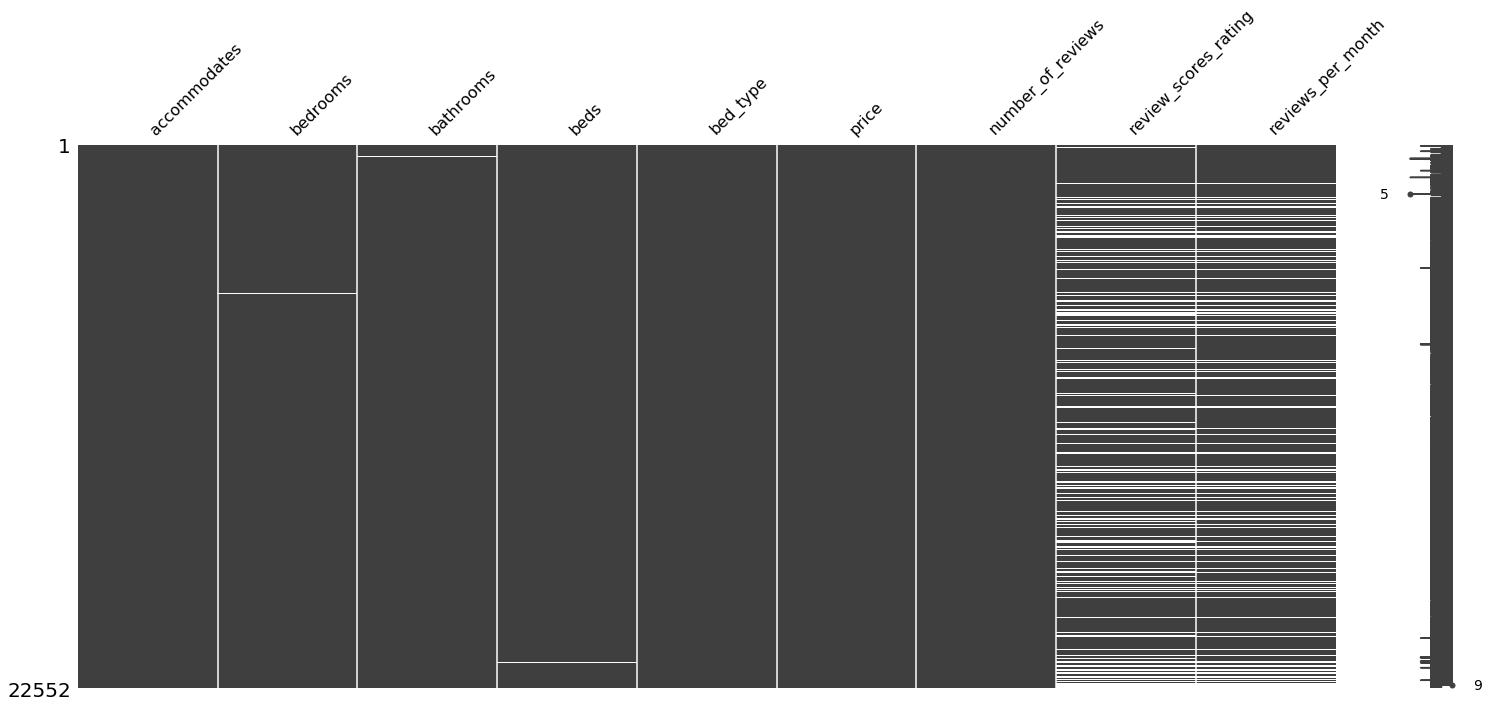

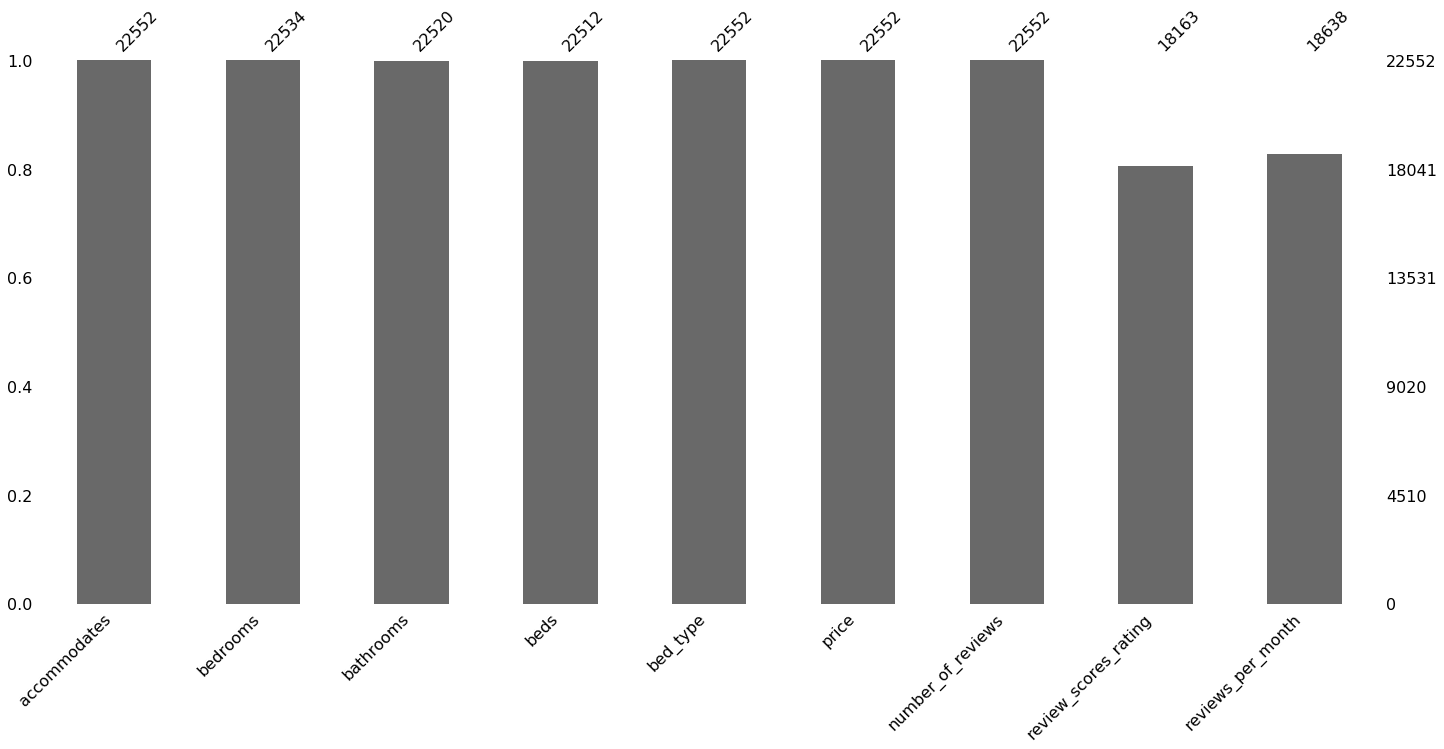

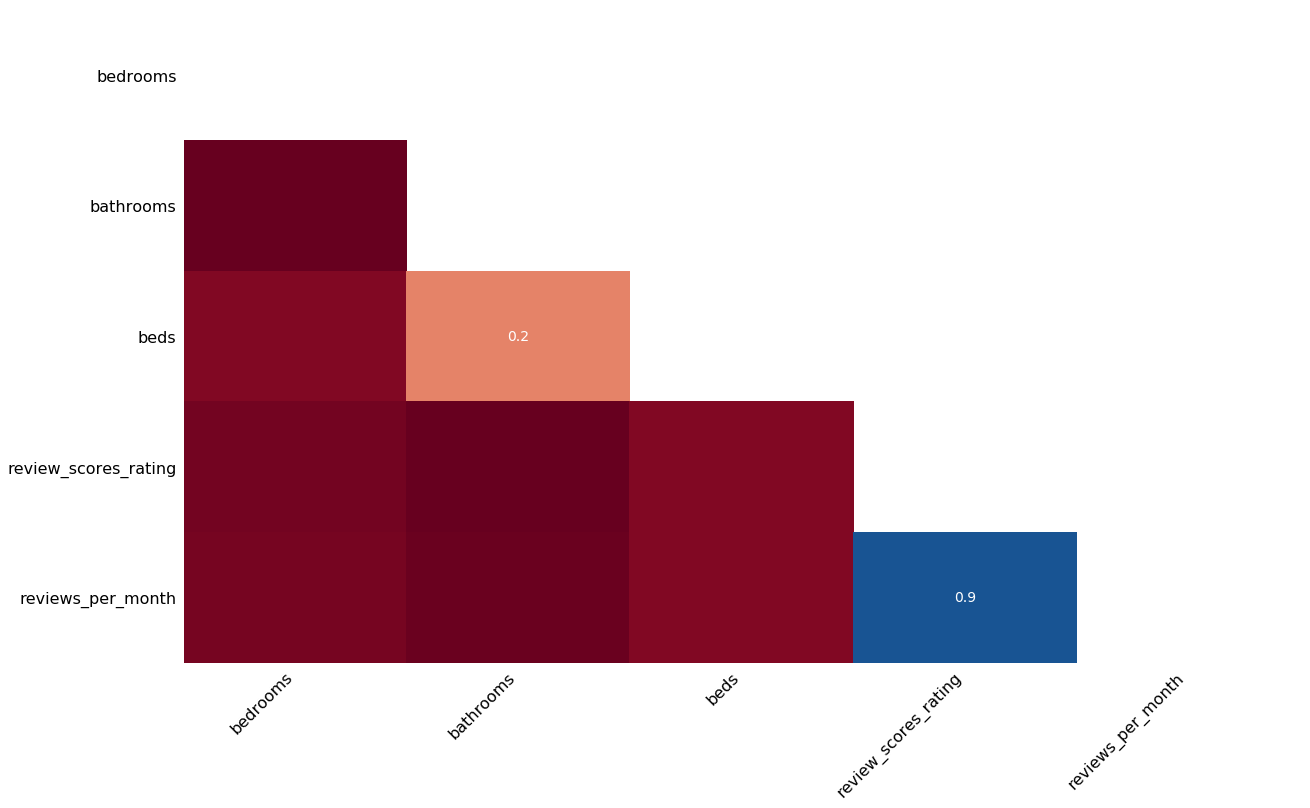

In [7]:
# This shows which fields have missing, and where they are missing. This is good for identifying where missing values are, 
# and whether there is correlation between the missings
msno.matrix(df_listing_outlier)

# This is a clearer plot of how many values are missing for each field (although doesn't show correlation)
msno.bar(df_listing_outlier)

# This a direct plot of the correlation between missing fields
try:
    msno.heatmap(df_listing_outlier) 
except ValueError:  #raised if there are no missings
    pass


There are very little missing for *bedrooms, bathrooms, beds*, so we will impute with the mode (noting that these are all integer values so mean will not make sense).

For the other numeric fields we will impute with the mean (*review_scores_rating, reviews_per_month*). Another better approach would be to apply knn imputation to impute these values, however this will not be detailed in this notebook.

In [8]:
# impute with mode
df_listing_outlier.loc[df_listing_outlier['bedrooms'].isna(),'bedrooms'] = np.float32(df_listing_outlier['bedrooms'].mode())
df_listing_outlier.loc[df_listing_outlier['bathrooms'].isnull(),'bathrooms'] = np.float32(df_listing_outlier['bathrooms'].mode())
df_listing_outlier.loc[df_listing_outlier['beds'].isnull(),'beds'] = np.float32(df_listing_outlier['beds'].mode())

# impute with mean
df_listing_outlier.loc[df_listing_outlier['review_scores_rating'].isnull()
                       ,'review_scores_rating'] = np.float32(df_listing_outlier['review_scores_rating'].mean())
df_listing_outlier.loc[df_listing_outlier['reviews_per_month'].isnull()
                       ,'reviews_per_month'] = np.float32(df_listing_outlier['reviews_per_month'].mean())


We also need to convert price to a numeric field.

In [9]:
df_listing_outlier.loc[:,'price'] = df_listing_outlier['price'].replace('[\$,]', '', regex=True).astype(float)

Finally, before applying the respective outlier detection algorithms, we need to preprocess the data.

1. Numeric features are scaled. This can either be min max scale or standardisation. Min max will preserve the distribution shape, whereas standardisation will make the dsitribution more normal around 0. We need to perform this to ensure no one feature will be implicitly given more weighting (particularly or DBSCAN).
2. One hot encode the categorical features. This is important so that the algorithm will treat them as separate, and not have an ordinal ranking between different values. (This is more a requiremnt for distance algorithms like DBSCAN, whereas isolation forest it is not necessary. However we will perform this regardless).

In [10]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

####################### 1. SCALE FEATURES THAT ARE NUMERIC ##########################################
scaler = MinMaxScaler() # initialise min max scaler
# scaler = StandardScaler() # initialise standardise scaler

# Get the list of numerical and categorical features
all_columns = df_listing_outlier.columns
cat_columns = ['bed_type']
num_columns = [elem for elem in all_columns if elem not in cat_columns]

# Scale the numerical features (not including the target variable)
df_listing_outlier_scale = scaler.fit_transform(df_listing_outlier[num_columns])

# Convert scaled dataset to dataframe
df_listing_outlier_scale = pd.DataFrame(data=df_listing_outlier_scale, columns=num_columns)
df_outlier_scale = pd.concat([df_listing_outlier_scale, df_listing_outlier[cat_columns]], axis=1)


####################### 2. CONVERT CATEGORICAL FEATURES USING ONE HOT ENCODING ######################
# For each categorical column, fit a label encoder.
# This assigns ordinal labels to each categorical column as 0, 1, 2 ...
# This is necessary before one hot encoding.
new_label = [] # This will be the new column names after one hot encoding
for col in cat_columns:
    print("Encoding {}".format(col))
    new_le = LabelEncoder()
    df_outlier_scale[col] = new_le.fit_transform(df_outlier_scale[col]) # replace with new ordinal label
    for i in range(0,len(df_outlier_scale[col].unique())): # create new column names
        new_label.append(col + "_" + str(i))

new_label = new_label + num_columns # Append numerical column names to one hot encoded columns

# Get the indices for each categorical column, this is needed for the one hot encoding
cat_columns_idx = [df_outlier_scale.columns.get_loc(col) for col in cat_columns]

# Create OneHotEncoder object
ohe = OneHotEncoder(categorical_features=cat_columns_idx, 
                    sparse=False, handle_unknown="ignore")

# Apply one hot encoding to dataset and output an array
df_outlier_transform = ohe.fit_transform(df_outlier_scale)

# Convert one hot encoded dataset to dataframe
df_outlier_transform = pd.DataFrame(data=df_outlier_transform, columns=new_label)
display(df_outlier_transform.head(n=10))


Encoding bed_type


/Users/jeffreylee/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,bed_type_0,bed_type_1,bed_type_2,bed_type_3,bed_type_4,accommodates,bedrooms,bathrooms,beds,price,number_of_reviews,review_scores_rating,reviews_per_month
0,0.0,0.0,0.0,0.0,1.0,0.133333,0.083333,0.117647,0.090909,0.006667,0.236948,0.912500,0.102291
1,0.0,0.0,0.0,0.0,1.0,0.066667,0.083333,0.117647,0.045455,0.001889,0.012048,1.000000,0.038462
2,0.0,0.0,0.0,0.0,1.0,0.200000,0.083333,0.117647,0.090909,0.010000,0.287149,0.900000,0.033824
3,0.0,0.0,0.0,1.0,0.0,0.066667,0.083333,0.117647,0.045455,0.002889,0.050201,0.850000,0.010366
4,0.0,0.0,0.0,0.0,1.0,0.066667,0.083333,0.117647,0.090909,0.004667,0.395582,0.950000,0.047463
5,0.0,0.0,0.0,0.0,1.0,0.400000,0.333333,0.294118,0.318182,0.020000,0.012048,1.000000,0.003819
6,0.0,0.0,0.0,0.0,1.0,0.066667,0.000000,0.117647,0.045455,0.007778,0.046185,0.912500,0.006001
7,0.0,0.0,0.0,0.0,1.0,0.066667,0.083333,0.117647,0.090909,0.013333,0.000000,0.930173,0.030702
8,0.0,0.0,0.0,0.0,1.0,0.266667,0.083333,0.117647,0.136364,0.010000,0.096386,0.925000,0.012548
9,0.0,0.0,0.0,0.0,1.0,0.066667,0.083333,0.117647,0.045455,0.005000,0.560241,0.950000,0.076923


#### 5.1 DBSCAN (Density-based spatial clustering of applications with noise)
DBSCAN is a clustering algorithm, that separates clusters of high density from those with lower density.

Two key parameters are:
- eps: radius of the circle
- min_samples: minimum number of points in the circle to be considered as part of the cluster

In [11]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 5) # Set up DBSCAN outlier detection
clusters = outlier_detection.fit_predict(df_outlier_transform) # predict on scaled and one hot encoded data
print("Number of outliers is ", list(clusters).count(-1)) # outliers are flagged as -1, so count number number of outliers by looking at -1

Number of outliers is  0


#### 5.2 Isolation Forest Algorithm
This is an ensemble decision tree algorithm. This is different from most algorithms in that it does not try and define what is a normal region, instead each sample is determined to be an anomaly based on its own characteristics. The algorithm isolates observations by randomly selecting a feature and splitting by a random value between min and max. The number of such splittings required to isolate the features is an indication of whether it is an outlier, since an outlier would be expected to have fewer splits.

The tree itself is trained as per a random forest.

In [12]:
from sklearn.ensemble import IsolationForest # import required library

contamination = 0.01 # proportion of outliers in the data
clf = IsolationForest(n_estimators = 100, behaviour='new', max_samples='auto', contamination=contamination)
preds = clf.fit_predict(df_outlier_transform)
print("Number of outliers is ",np.count_nonzero(preds==-1)) # outliers are flagged as -1 as well
df_outlier_transform_clean = df_outlier_transform[np.where(preds==1, True, False)] # Remove data that are outliers

Number of outliers is  226


We notice that there are a lot more outliers using the isolation forest algorithm compared to DBSCAN. Outlier count is sensitive to the method and assumptions being used (e.g. contamination hyperparameter), and it is important to understand the difference between each. Perhaps running multiple algorithms can give us a better idea of what is an outlier and why.

We note in particular that for the Isolation forest algorithm, the contamination parameter specifies how many outliers there are likely to be, compared to DBSCAN. This highlights why it is important to actually go in and look at the data to understand if these are truly outliers.